# Loading the PSL indices, and comparing them against

## Load Libraries

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [34]:
import numpy.ma as ma
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loading.psl import get_psl_indices, get_ersstv5
from src.xr_utils import can_coords, fix_calendar, sel
from src.metrics import nino_calculate
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=200)

In [3]:
# Dowload the PSL indices from the website
ds = get_psl_indices()
df = ds.to_dataframe()

In [4]:
ersstv5 = get_ersstv5()
ersstv5_slim = ersstv5.sel(time=slice("1948", "2021"))
ersstv5_can = fix_calendar(can_coords(ersstv5_slim)).isel(variable=0)

In [7]:
# my_metric_ds, climatology = nino_calculate(fix_calendar(can_coords(ersstv5_slim)))

warning, not changing:  variable


In [43]:
def comp(name: str, varx: np.array, vary: np.array) -> None:
    """Function to compare two different sequences to see how closely they match"""
    print("\n\n=====", name, "=====")
    mask = ~np.isnan(varx) & ~np.isnan(vary)
    print(
        "correlation matrix",
        ma.corrcoef(ma.masked_invalid(varx), ma.masked_invalid(vary)),
    )
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
        varx[mask], vary[mask]
    )
    print(f"slope: {slope}")
    print(f"intercept: {intercept}")
    print(f"r_value: {r_value}")
    print(f"p_value: {p_value}")
    print(f"std_err: {std_err}")
    print("==================\n\n\n")
    plt.scatter(varx, vary)
    plt.xlabel(f"{name} target (psl)")
    plt.ylabel(f"{name} result (our code)")
    plt.show()



===== nino3.4 =====
correlation matrix [[1.0 0.998794655697617]
 [0.998794655697617 1.0]]
slope: 0.9953671071300163
intercept: 0.20171243976213266
r_value: 0.9987946556976167
p_value: 0.0
std_err: 0.0016680055790584797





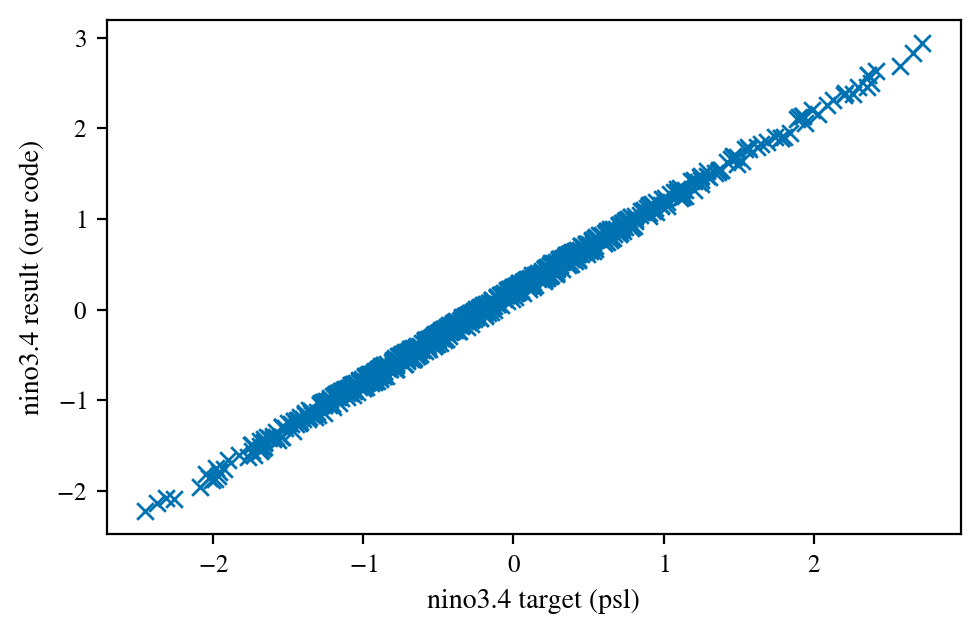



===== nino3 =====
correlation matrix [[1.0 0.9983586329289734]
 [0.9983586329289734 1.0]]
slope: 0.995138089242093
intercept: 0.24110258121849562
r_value: 0.998358632928974
p_value: 0.0
std_err: 0.0019466466185894748





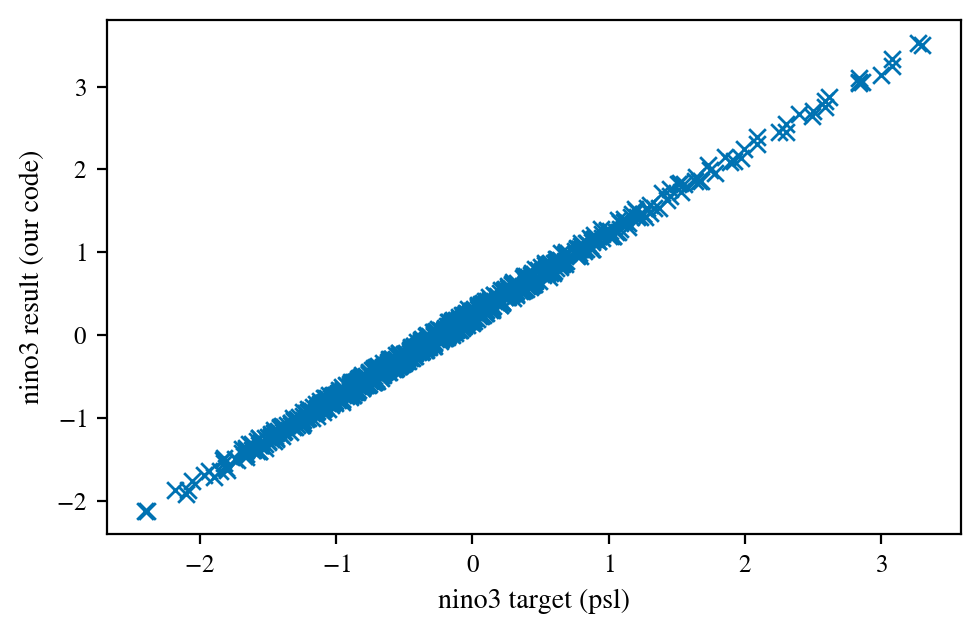



===== nino4 =====
correlation matrix [[1.0 0.9984668609648092]
 [0.9984668609648092 1.0]]
slope: 0.9877885417259548
intercept: 0.2758879118231335
r_value: 0.998466860964809
p_value: 0.0
std_err: 0.00186732688227996





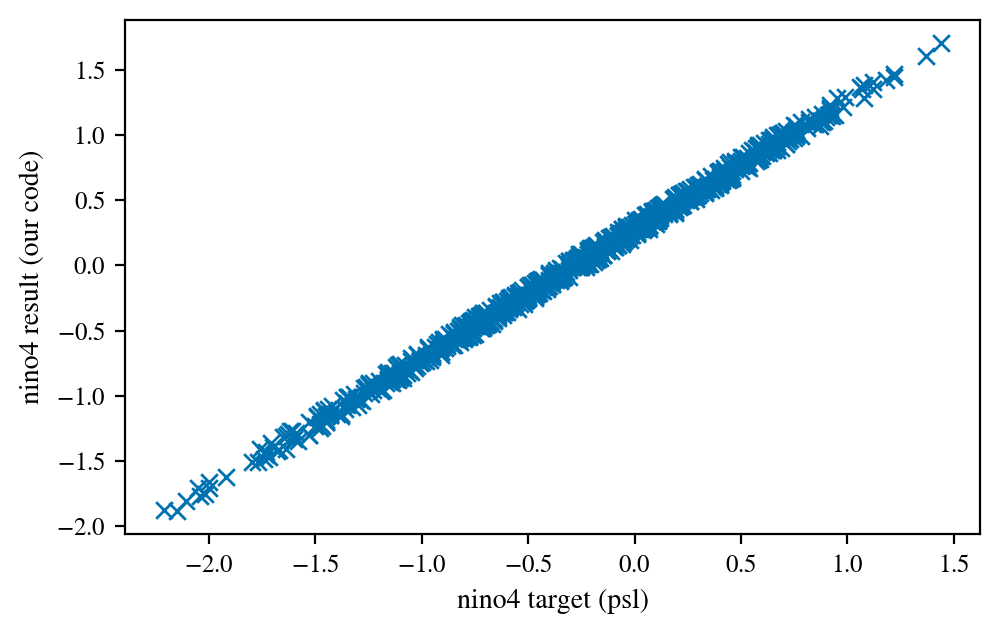



===== nino1+2 =====
correlation matrix [[1.0 0.9992073362076906]
 [0.9992073362076906 1.0]]
slope: 0.9648830615246707
intercept: 0.2757369748548087
r_value: 0.9992073362076904
p_value: 0.0
std_err: 0.0013108206415181742





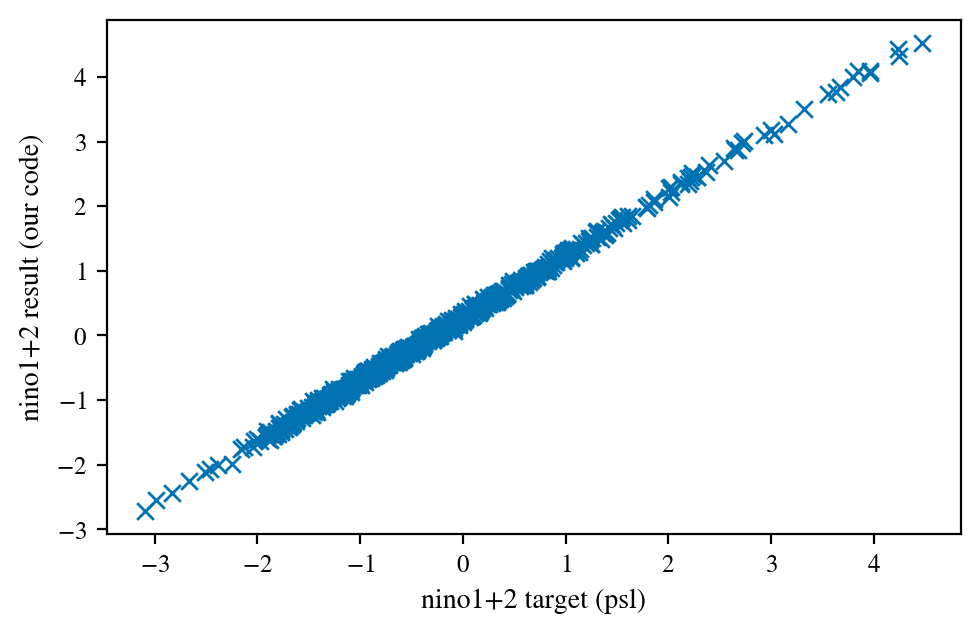

In [44]:
for x, y in [
    ("nino3.4", "nino3.4"),
    ("nino3", "nino3"),
    ("nino4", "nino4"),
    ("nino1+2", "nino1+2"),
]:
    my_nino_da, climatology_da = nino_calculate(ersstv5_can, reg=y, roll_period=1)
    my_nino = my_nino_da.values
    psl_nino = ds[x].sel(time=slice("1948", "2021-10")).values
    comp(x, psl_nino, my_nino,)